# Design of Experiment

## Data Loading

In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Problem: Classifying body performance of a person based on several features

Attributes:
- age : 20 ~64
- gender : F,M
- height_cm : (If you want to convert to feet, divide by 30.48)
- weight_kg
- body fat_%
- diastolic : diastolic blood pressure (min)
- systolic : systolic blood pressure (min)
- gripForce
- sit and bend forward_cm
- sit-ups counts
- broad jump_cm
- class : A,B,C,D ( A: best) / stratified

data taken from https://www.kaggle.com/datasets/kukuroo3/body-performance-data

In [6]:
df = pd.read_csv("../dataset/bodyPerformance.csv")

## Data Statistics

In [7]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [8]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [17]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

tidak ada data yang hilang

In [18]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [14]:
categorical_col = df.select_dtypes(include=["object"]).columns
print(categorical_col)

Index(['gender', 'class'], dtype='object')


In [20]:
num_cols = df.select_dtypes(exclude=["object"]).columns
print(num_cols)

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')


In [34]:
df = df.sort_values(by="class")

## EDA

### Numerical Analysis

In [21]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

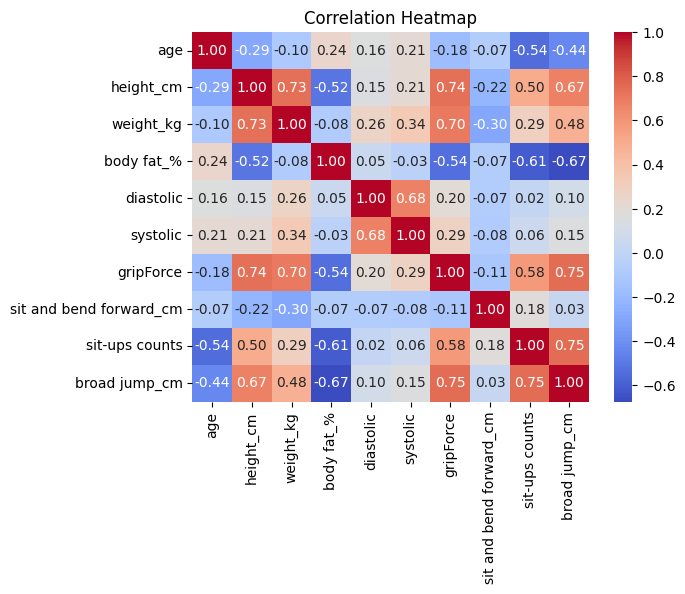

In [35]:
sns.heatmap(df[num_cols].corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")

dapat dilihat bahwa banyak korelasi yang kuat diantara fitur, hal tersebut dapat menjadi pertimbangan processing selanjutnya seperti clustering atau PCA

<Axes: xlabel='body fat_%', ylabel='sit-ups counts'>

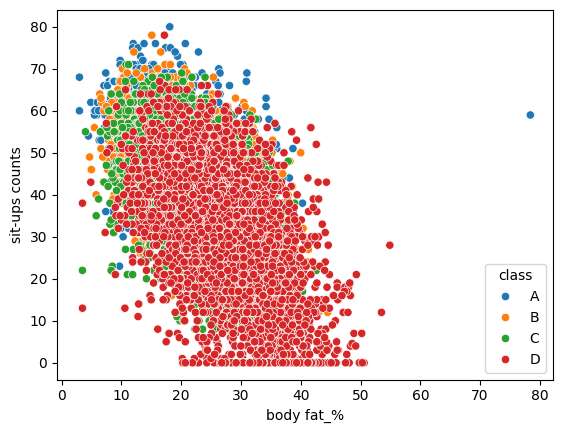

In [40]:
sns.scatterplot(data=df,x="body fat_%",y="sit-ups counts",hue="class")

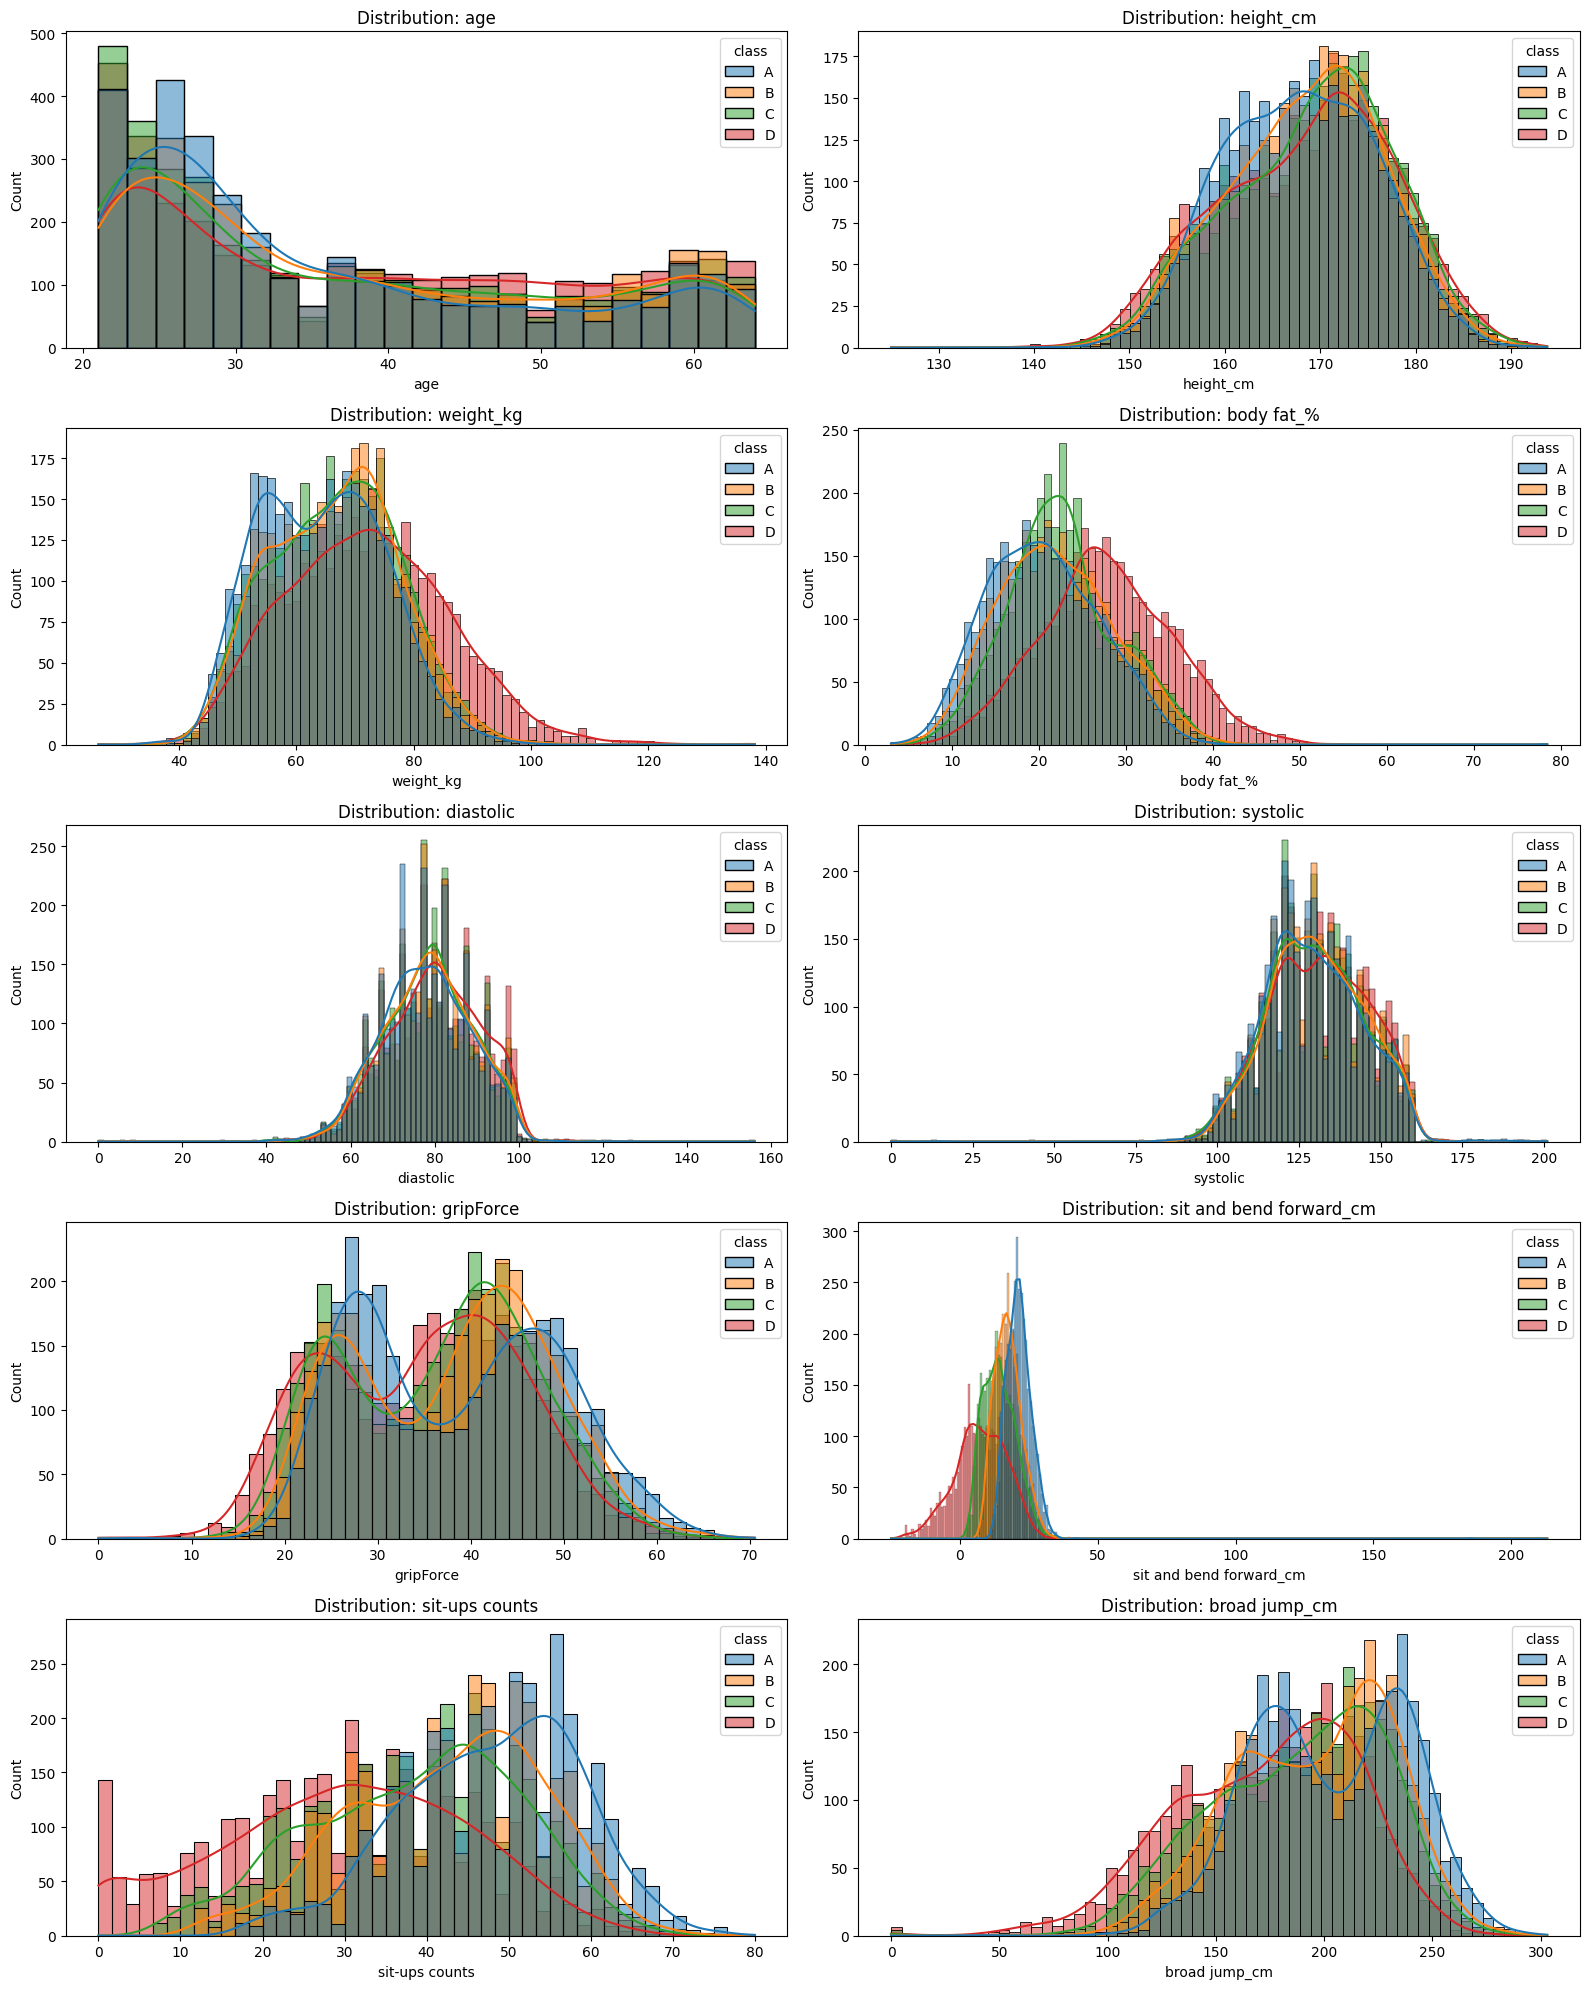

In [36]:
fig, ax = plt.subplots(5, 2, figsize=(16, 20))
for i, col in enumerate(num_cols):
    r, c = divmod(i, 2)
    sns.histplot(data=df,x=df[col], hue=df["class"],ax=ax[r, c], kde=True)
    ax[r, c].set_title(f'Distribution: {col}')
plt.tight_layout()
plt.show()

Kebanyakan distribusi disini berbentuk normal dengan skewness-nya masing-masing. Namun, Age disini tidak terlalu mengikuti distribusi apapun, dan gripForce disini memiliki distribusi Bimodal karena memiliki 2 peaks. Jenis distribusi ini akan menjadi pertimbangan Data Scaling nantinya.

Lalu dapat dilihat pada beberapa fitur seperti sit-ups count, broadjump, sit_and_bend_forward,gripForce,dan bodyFat terdapat separasi yang jelas diantara golongan target. Hal tersebut menandakan bahwa fitur tersebut mungkin bisa cukup menjelaskan target>

#### Outlier Analysis

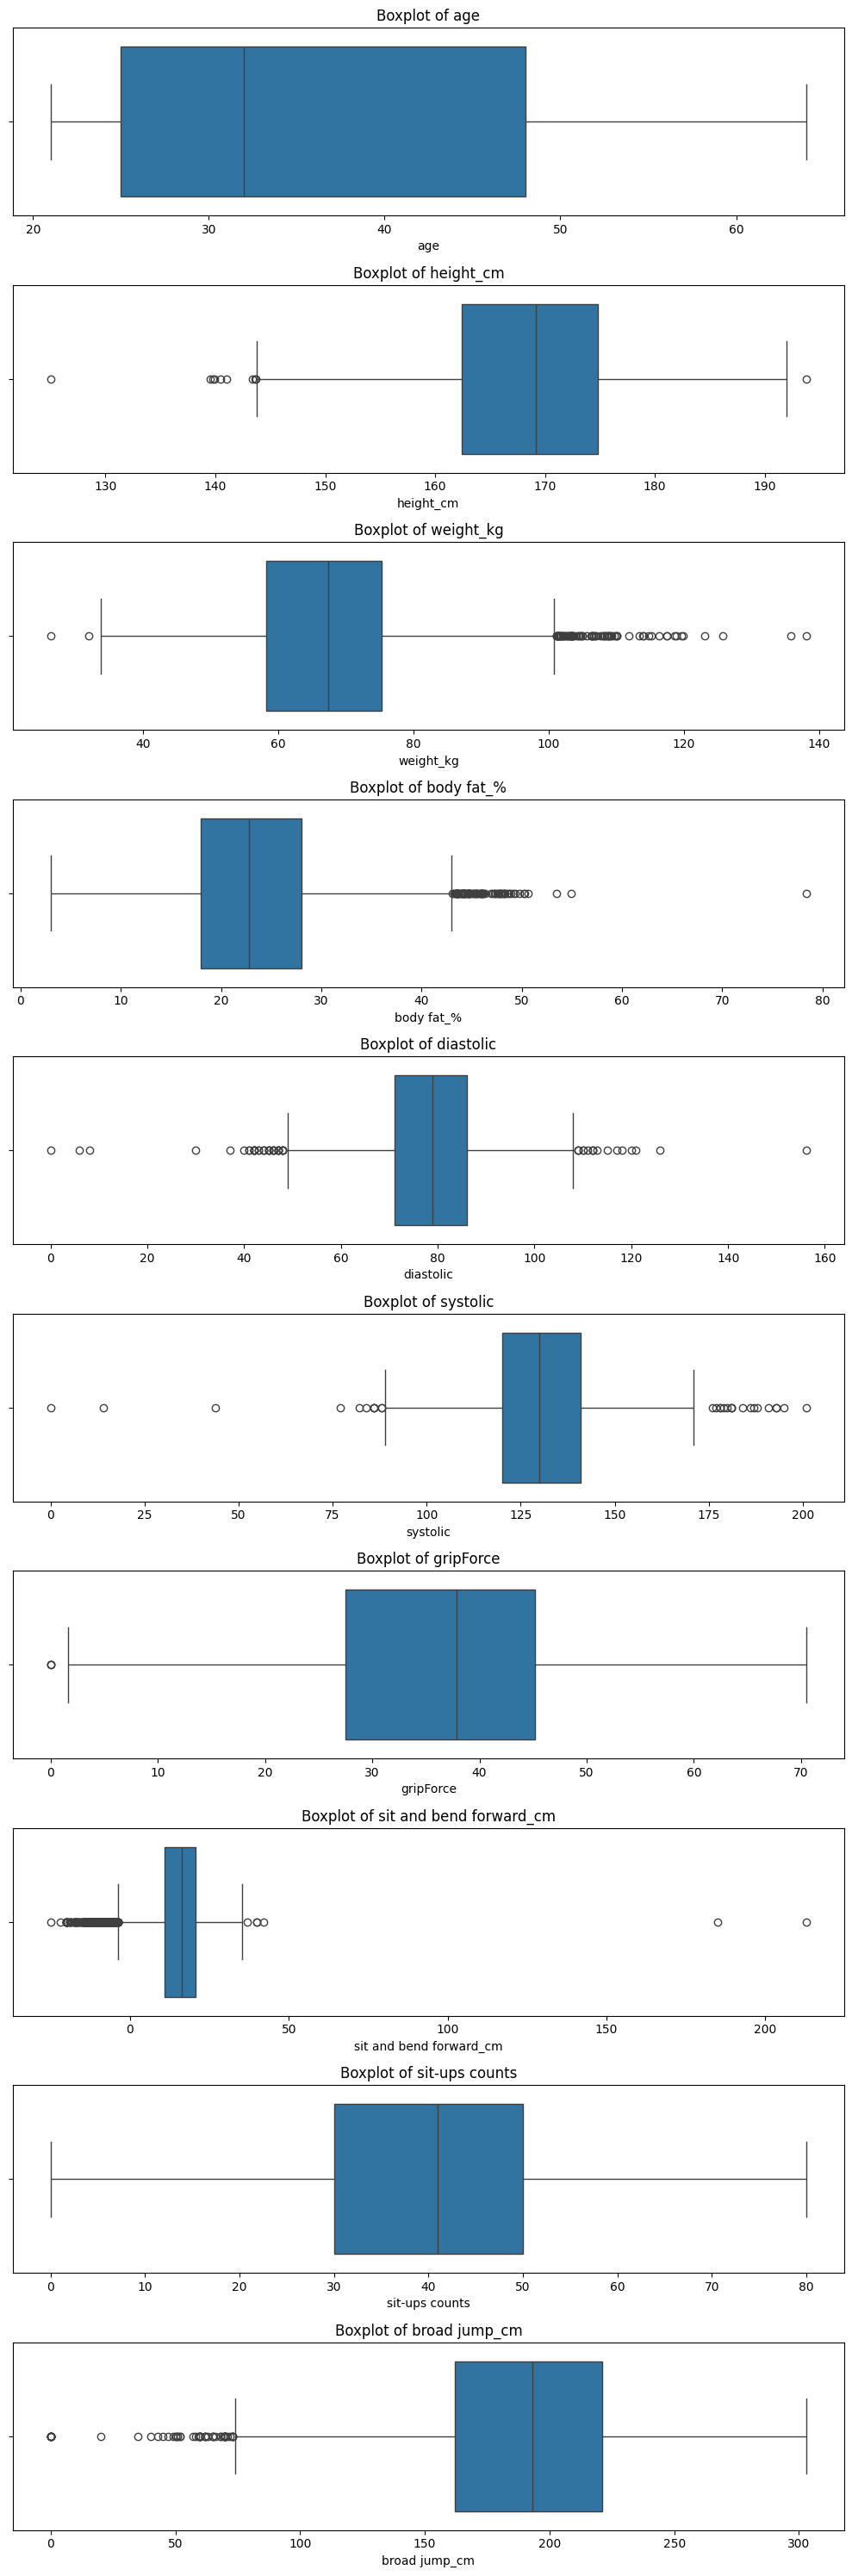

In [41]:
fig, ax = plt.subplots(len(num_cols), 1, figsize=(10, 30))
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

ada beberapa anomali disini seperti tekanan darah 0, bodyfat hampir 80%, gripforce 0, dan bend forward 200 cm, hal tersebut akan dihapus

### Categorical Columns

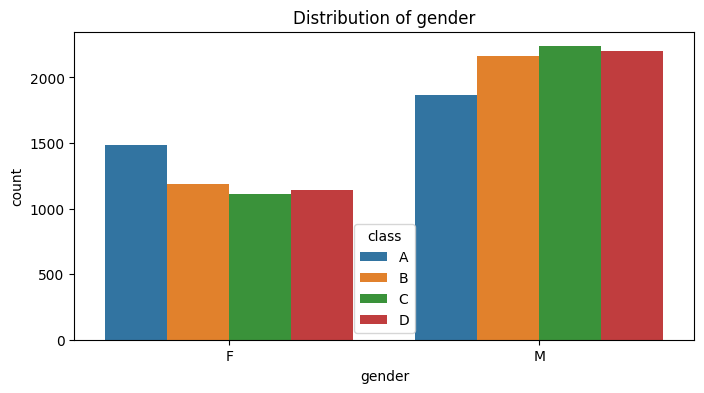

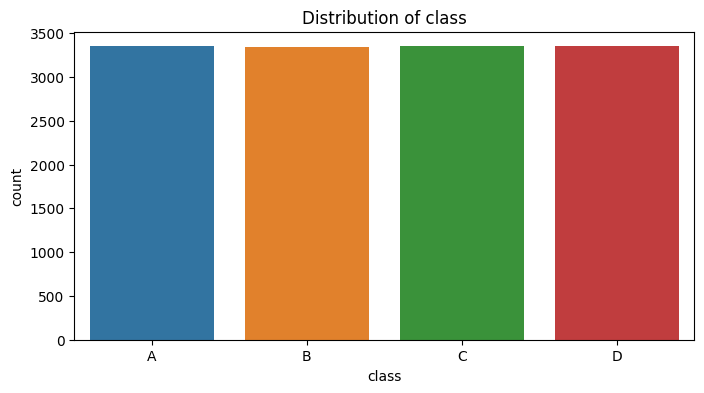

In [37]:
for col in categorical_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="class")
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: xlabel='class', ylabel='count'>

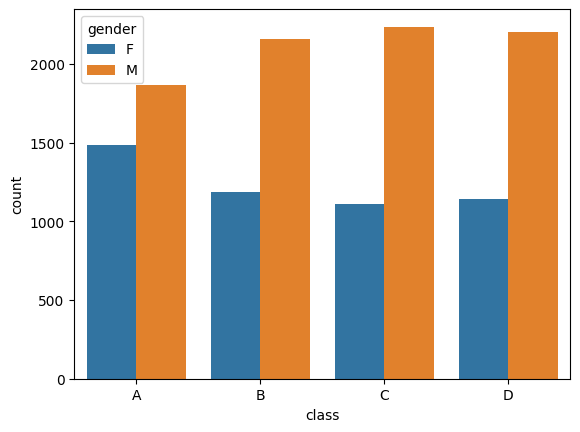

In [38]:
sns.countplot(data=df,x="class",hue="gender")

## Data Preprocessing

### Outlier Removal

In [199]:
df_transformed = df.copy()

hapus row dengan bodyfat 80% yang ditemukan sebelumnya

In [200]:
df_transformed = df_transformed.drop(df_transformed['body fat_%'].idxmax())

liat row dengan tekanan darah 0

In [201]:
df_transformed[(df_transformed["systolic"] == 0) | (df_transformed["diastolic"] == 0)]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
10624,26.0,F,160.0,63.56,32.0,0.0,0.0,23.7,17.1,23.0,128.0,D


karena sepertinya normal di fitur lainnya, maka akan kita ganti dengan mean.

In [202]:
mean_systolic = df_transformed.loc[df_transformed["systolic"] != 0, "systolic"].mean()
mean_diastolic = df_transformed.loc[df_transformed["diastolic"] != 0, "diastolic"].mean()

df_transformed.loc[df_transformed["systolic"] == 0, "systolic"] = mean_systolic
df_transformed.loc[df_transformed["diastolic"] == 0, "diastolic"] = mean_diastolic


lalu karena sistolik dan diastolik dianggap hypotensi di 90/60, dan banyak value yang jatuh jauh dibawah ini di data ini. Maka kita akan memberikan lower bound dengan -20, yaitu di 70/40

In [203]:
df_transformed.loc[df_transformed["systolic"]<70,"systolic"] =70
df_transformed.loc[df_transformed["diastolic"]<40,"diastolic"] =40


cek broadjump 0

In [204]:
df_transformed[df_transformed["broad jump_cm"] == 0]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
4756,28.0,M,176.6,82.2,20.7,83.0,126.0,40.9,17.6,46.0,0.0,C
7721,56.0,F,156.0,51.1,28.4,73.0,113.0,20.7,23.0,23.0,0.0,C
7366,50.0,M,178.2,88.4,23.4,85.0,146.0,54.9,19.3,51.0,0.0,C
484,22.0,F,167.4,66.2,34.0,62.0,110.0,28.5,11.2,38.0,0.0,C
1919,59.0,F,162.9,61.0,32.6,82.0,123.0,29.7,19.5,0.0,0.0,D
712,58.0,M,168.7,76.1,27.5,84.0,139.0,34.5,2.0,0.0,0.0,D
7954,61.0,F,153.0,64.6,31.4,77.0,152.0,14.0,20.6,0.0,0.0,D
7944,45.0,F,153.4,33.7,16.1,81.0,124.0,6.7,11.5,8.0,0.0,D
8599,60.0,F,160.0,76.9,50.3,82.0,141.0,20.1,-8.1,0.0,0.0,D
4900,60.0,F,162.2,67.3,41.8,47.0,131.0,22.1,19.5,0.0,0.0,D


karena tidak terlihat ada alasan tertentu untuk angka 0 disini, akan dianggap sebagai missing data dan diganti dengan mean

In [205]:
mean_broad_jump = df_transformed.loc[df_transformed["broad jump_cm"] != 0, "broad jump_cm"].mean()
df_transformed.loc[df_transformed["broad jump_cm"] == 0,"broad jump_cm"] = mean_broad_jump 

cek gripforce 0

In [206]:
df_transformed[df_transformed["gripForce"]==0]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
9486,45.0,M,172.4,56.7,9.3,72.0,127.0,0.0,9.4,43.0,213.0,B
9768,27.0,M,172.4,83.0,20.2,99.0,153.0,0.0,17.2,56.0,261.0,C
8562,22.0,F,160.4,52.3,34.2,79.0,111.0,0.0,15.2,45.0,165.0,D


sama seperti sebelumnya, karena tidak terlihat ada alasan tertentu untuk angka 0 disini, akan dianggap sebagai missing data dan diganti dengan mean

In [207]:
mean_gripforce = df_transformed.loc[df_transformed["gripForce"] != 0, "gripForce"].mean()
df_transformed.loc[df_transformed["gripForce"] == 0,"gripForce"] = mean_gripforce 

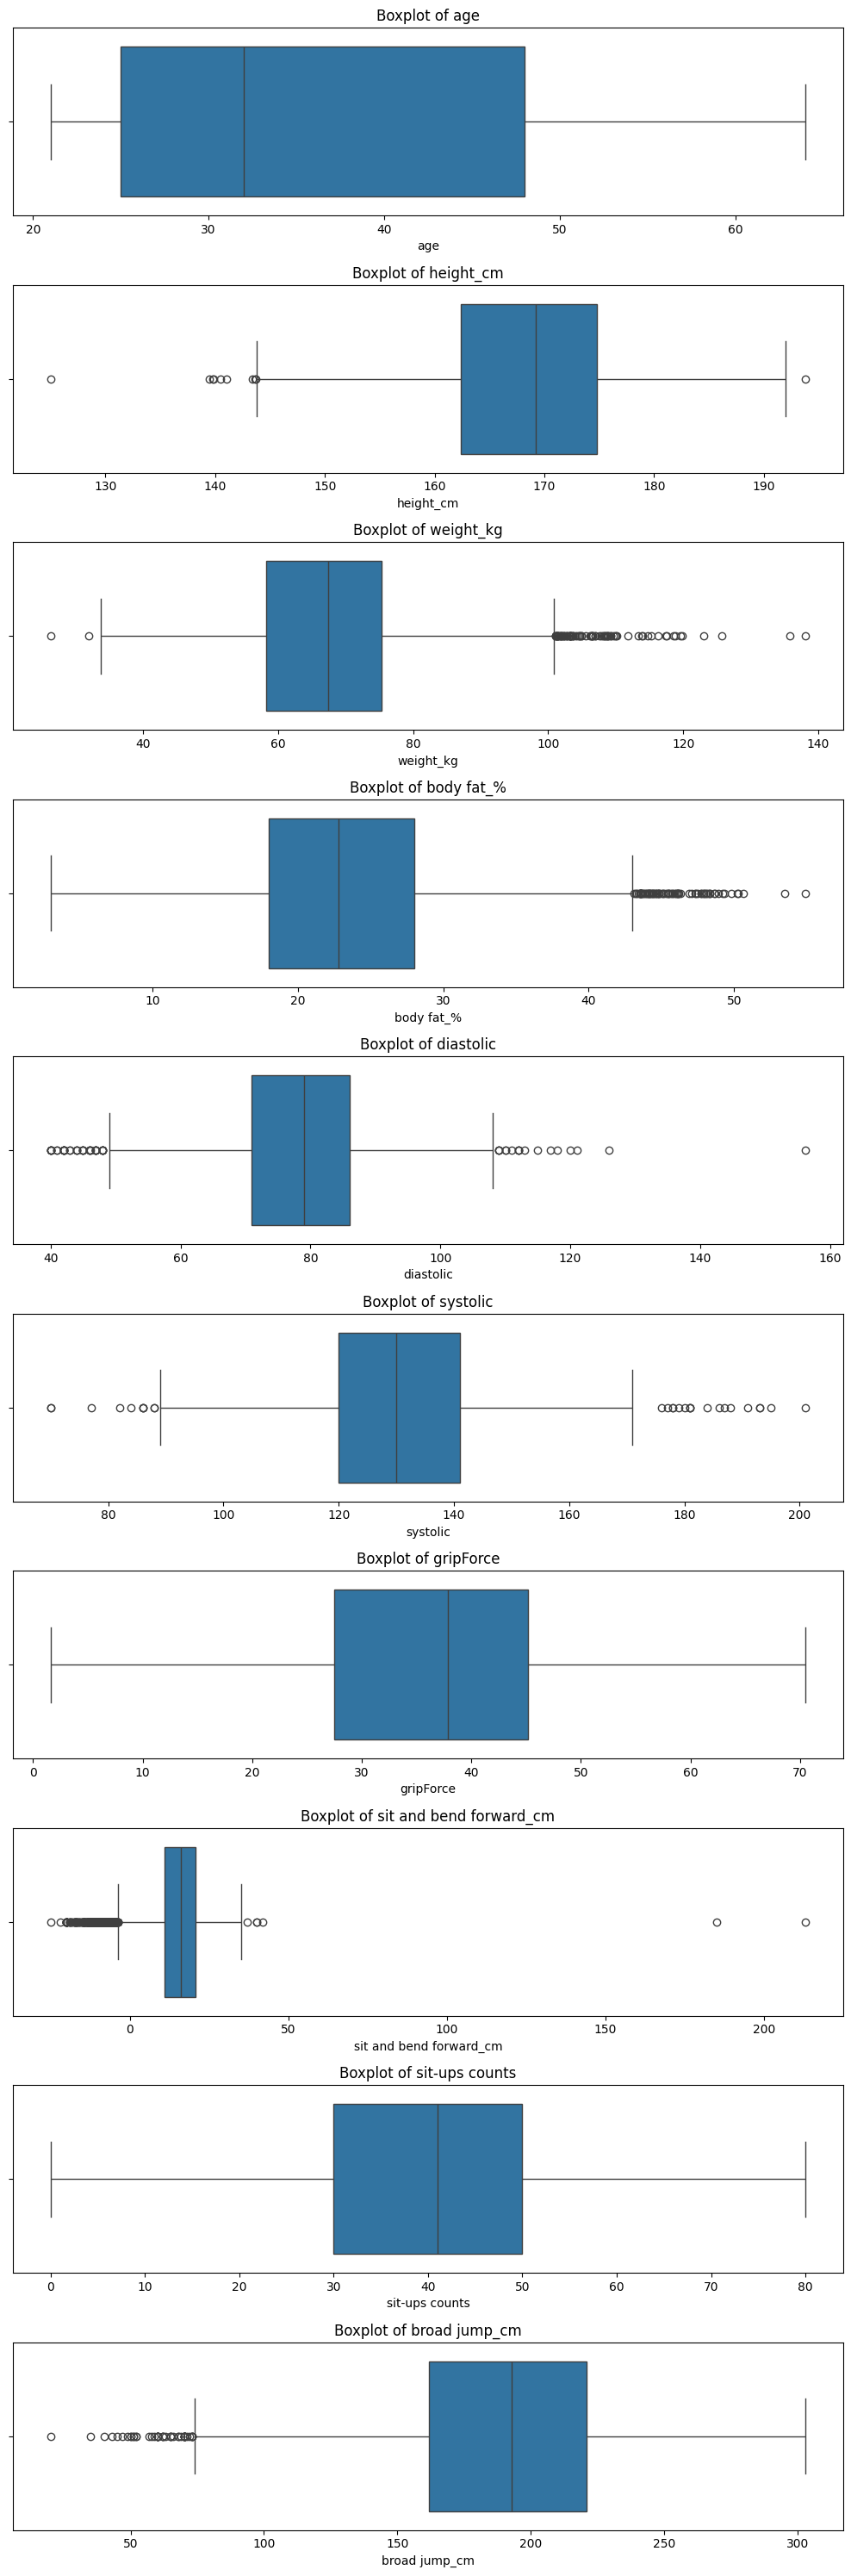

In [208]:
fig, ax = plt.subplots(len(num_cols), 1, figsize=(10, 30))
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_transformed, x=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Data Transformation

sesuai penemuan distribusi diatas, maka fitur yang memiliki distribusi normal akan di-standardize, dan yang tidak akan di-normalize.

Alasan hal ini dilakukan adalah karena model tentu tidak mengetahui satuan yang dimiliki tiap fitur, sehingga jika tidak dilakukan transformasi, bisa saja ada fitur yang berdampak jauh lebih besar hanya karena nilainya memang jauh lebih besar dibandingkan lainnya. Dengan standardization dan normalization, semua fitur seakan memiliki satuan yang sama sehingga mempengaruhi model secara rata

In [209]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax = MinMaxScaler()
ss = StandardScaler()

df_transformed["age"] = minmax.fit_transform(df_transformed[["age"]])
for col in num_cols:
    if col != "age":
        df_transformed[col] = ss.fit_transform(df_transformed[[col]])

sekarang untuk column gender, kita akan melakukan onehot encoding untuk mencegah munculnya urutan oleh label encoding, dan karena dimensionalitasnya kecil

In [210]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
gender_encoded = oh.fit_transform(df_transformed[["gender"]]).toarray()
gender_encoded_df = pd.DataFrame(gender_encoded, columns=oh.get_feature_names_out(["gender"]), index=df_transformed.index)
df_transformed = pd.concat([df_transformed.drop("gender", axis=1), gender_encoded_df], axis=1)

lalu untuk variable target class, kita akan melakukan mapping A-D menjadi 0-3, dimana semakin kecil angkanya semakin bugar

In [211]:
df_transformed["class"] = df_transformed["class"].map({"A": 0, "B": 1, "C": 2, "D": 3})

In [212]:
df_transformed.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
2363,0.000000,-0.695345,-0.857507,0.492179,-0.636940,-1.793642,-0.977507,2.269536,0.226273,-0.057389,0,1.0,0.0
11438,0.069767,-1.288731,-1.794784,0.298840,-0.824018,-0.700428,-1.015206,0.744020,0.366371,-0.436887,0,1.0,0.0
11437,0.046512,-0.469859,-0.874244,-0.419276,-1.011096,-2.066946,-0.270641,0.838625,0.576518,-0.209188,0,1.0,0.0
6065,0.000000,-1.276863,-0.798927,0.367890,-1.665869,-2.613553,-0.977507,1.169745,0.996811,-0.006789,0,1.0,0.0
2845,0.232558,-1.098848,-1.217354,-1.082152,0.766145,-0.222147,-0.534538,0.578460,0.576518,-0.006789,0,1.0,0.0


### Feature Selection

feature selection dilakukan agar kita mengetahui fitur yang kurang bermanfaat dalam menjelaskan target sehingga dapat dibuang dan tidak menjadi noise

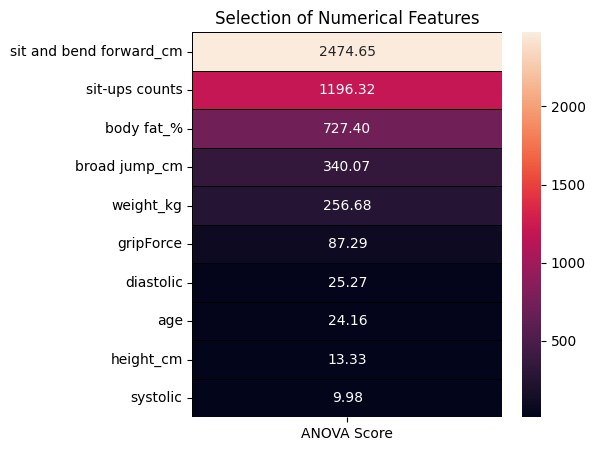

In [213]:
from sklearn.feature_selection import f_classif, SelectKBest

features = df_transformed.loc[:,num_cols]
target = df_transformed.loc[:,"class"]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

4 fitur terbawah secara relatif tidak terlalu menjelaskan fitur target, namun bukan berarti harus dibuang. Kita akan mencoba menarik informasi dari fitur-fitur tersebut melalui unsupervised learning

<Axes: xlabel='sit and bend forward_cm', ylabel='class'>

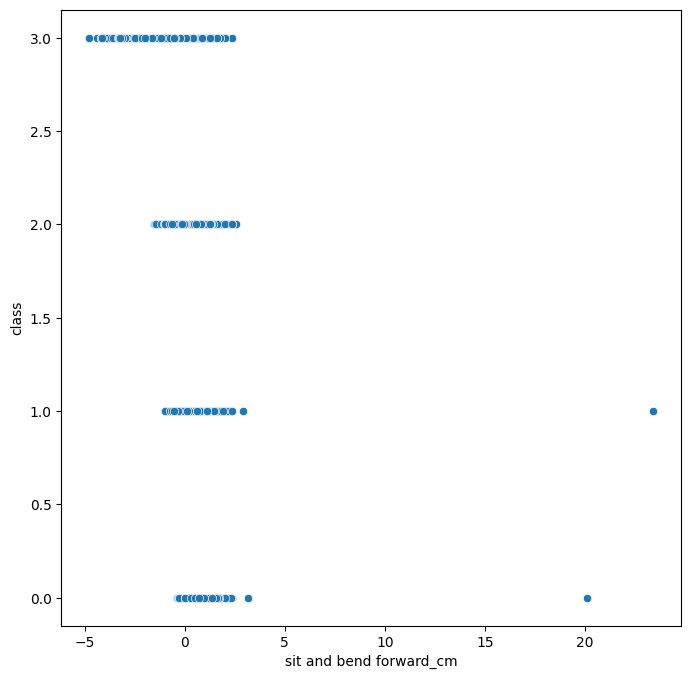

In [214]:
sns.scatterplot(data=df_transformed,x="sit and bend forward_cm",y="class")

disini dapat terlihat bahwa fitur sit and bend forward_cm sangat menjelaskan target class

### Feature Engineering (Unsupervised learning)

sesuai dari penemuan sebelumnya, 4 fitur terbawah akan kita coba ekstraksi informasi lebih lanjut dengan unsupervised learning. Kita juga akan menambah weight dan bodyfat karena cukup berkorelasi dengan beberapa fitur tersebut

In [215]:
unsup_features = ["systolic","diastolic","age","height_cm","weight_kg","body fat_%"]

In [216]:
df_unsup = df_transformed[unsup_features]


In [217]:
df_unsup.head()

,systolic,diastolic,age,height_cm,weight_kg,body fat_%
2363,-1.793642,-0.636940,0.000000,-0.695345,-0.857507,0.492179
11438,-0.700428,-0.824018,0.069767,-1.288731,-1.794784,0.298840
11437,-2.066946,-1.011096,0.046512,-0.469859,-0.874244,-0.419276
6065,-2.613553,-1.665869,0.000000,-1.276863,-0.798927,0.367890
2845,-0.222147,0.766145,0.232558,-1.098848,-1.217354,-1.082152


#### K-means

kita akan mencoba clustering dengan KMeans, pertama kita akan mencari jumlah cluster optimal dengan silhoutte score

In [218]:
from unsupervised_learning.kmeans import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_unsup)
    clusters = kmeans.predict(df_unsup)

    print(f"n_cluster {i}-> Sil_score:{silhouette_score(df_unsup,clusters)}")


n_cluster 2-> Sil_score:0.28857346791237304
n_cluster 3-> Sil_score:0.2431749429171342
n_cluster 4-> Sil_score:0.2257255082370831
n_cluster 5-> Sil_score:0.20779929860193386
n_cluster 6-> Sil_score:0.19154410281521558


maka kita akan mencoba dengan 2 cluster

In [219]:
# from scratch
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_unsup)
clusters = kmeans.predict(df_unsup)
print(pd.Series(clusters).value_counts())

0    7746
1    5646
Name: count, dtype: int64


In [220]:
# SKLEARN
from sklearn.cluster import KMeans as SKMEANS
skmeans = SKMEANS(n_clusters=2)
skmeans.fit(df_unsup)
sk_clus=skmeans.predict(df_unsup)
print(pd.Series(sk_clus).value_counts())

0    7762
1    5630
Name: count, dtype: int64


KMeans from scratch dan Sklearn relatif cukup sama, perbedaan mungkin terjadi karena pemilihan centroid

#### DBSCAN

pertama kita akan mencari nilai epsilon optimal lewat bantuan NearestNeighbors

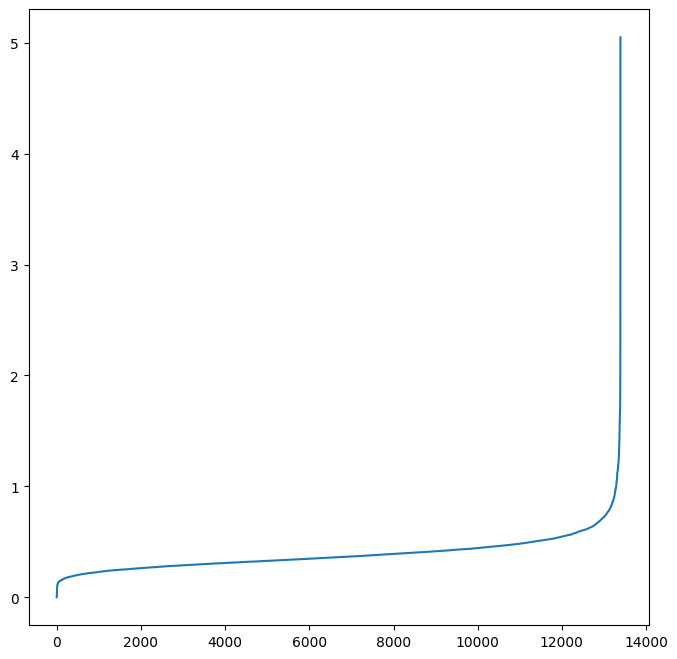

In [221]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_unsup)
distances, indices = nbrs.kneighbors(df_unsup)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = 8,8
plt.plot(distances)

akan dipilih epsilon 0.7 karena membentuk elbow

In [222]:
from unsupervised_learning.dbscan import DBSCAN
# from scratch
dbscan = DBSCAN(epsilon=0.7)
db_clusters = dbscan.fit_predict(df_unsup)
print(pd.Series(db_clusters).value_counts())

 0.0    12739
-1.0      653
Name: count, dtype: int64


In [223]:
from sklearn.cluster import DBSCAN as SKDBSCAN
# SKLEARN
skdbscan = SKDBSCAN(eps=0.7)
skdb_clus = skdbscan.fit_predict(df_unsup)
print(pd.Series(skdb_clus).value_counts())

 0    12739
-1      653
Name: count, dtype: int64


disini implementasi from scratch sama persis dengan sklearn

#### PCA

pca digunakan untuk mereduksi dimensionalitas dengan mencoba untuk menggabungkan fitur-fitur. Disini kita akan mereduksinya menjadi 1 fitur saja

In [224]:
from unsupervised_learning.pca import PCA
# From scratch
pca = PCA(n_components=1)
pca_col = pca.fit_transform(df_unsup)
print(pca_col[:5])

[[-2.01510768]
 [-2.3642746 ]
 [-1.95239541]
 [-3.05106698]
 [-0.75394365]]


In [225]:
print(pca.explained_variance_ratio)

[0.44453797]


In [226]:
from sklearn.decomposition import PCA as SKPCA
# SKLEARN
skpca = SKPCA(n_components=1)
skpca_col = skpca.fit_transform(df_unsup)
print(skpca_col[:5])

[[-2.01510768]
 [-2.3642746 ]
 [-1.95239541]
 [-3.05106698]
 [-0.75394365]]


In [227]:
print(skpca.explained_variance_ratio_)

[0.44453797]


implementasi from scratch dan sklearn sama

#### Feature Goodness Test

In [228]:
test_df = df_transformed.copy()
test_df["kmeans_cluster"] = clusters
test_df["dbscan_cluster"] = db_clusters
test_df["pca_feature"] = pca_col.flatten()
test_df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M,kmeans_cluster,dbscan_cluster,pca_feature
2363,0.000000,-0.695345,-0.857507,0.492179,-0.636940,-1.793642,-0.977507,2.269536,0.226273,-0.057389,0,1.0,0.0,1,0.0,-2.015108
11438,0.069767,-1.288731,-1.794784,0.298840,-0.824018,-0.700428,-1.015206,0.744020,0.366371,-0.436887,0,1.0,0.0,1,0.0,-2.364275
11437,0.046512,-0.469859,-0.874244,-0.419276,-1.011096,-2.066946,-0.270641,0.838625,0.576518,-0.209188,0,1.0,0.0,1,0.0,-1.952395
6065,0.000000,-1.276863,-0.798927,0.367890,-1.665869,-2.613553,-0.977507,1.169745,0.996811,-0.006789,0,1.0,0.0,1,0.0,-3.051067
2845,0.232558,-1.098848,-1.217354,-1.082152,0.766145,-0.222147,-0.534538,0.578460,0.576518,-0.006789,0,1.0,0.0,1,0.0,-0.753944


In [229]:
new_cols = test_df.columns
new_cols = new_cols.drop("class")
print(new_cols)

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'gender_F', 'gender_M', 'kmeans_cluster',
       'dbscan_cluster', 'pca_feature'],
      dtype='object')


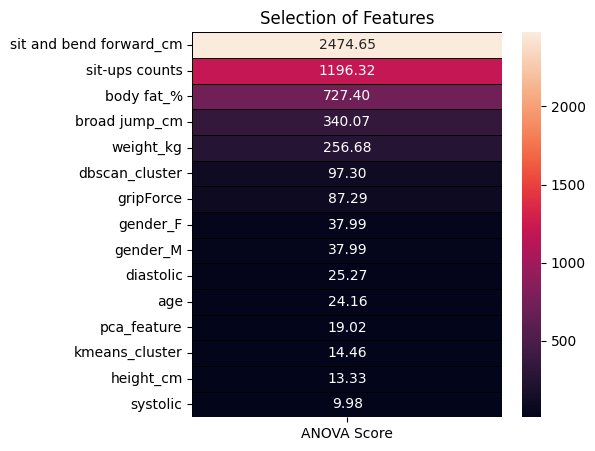

In [230]:
features = test_df.loc[:,new_cols]
target = test_df.loc[:,"class"]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Features');

dapat dilihat disini fitur baru dbscan_cluster memiliki nilai yang tinggi, maka kita akan menambah fitur tersebut dan drop 4 fitur bottom sebelumnya

In [231]:
df_transformed["dbscan_cluster"] = db_clusters
df_transformed = df_transformed.drop(["systolic","diastolic","age","height_cm"],axis=1)

In [232]:
df_transformed.head()

,weight_kg,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M,dbscan_cluster
2363,-0.857507,0.492179,-0.977507,2.269536,0.226273,-0.057389,0,1.0,0.0,0.0
11438,-1.794784,0.298840,-1.015206,0.744020,0.366371,-0.436887,0,1.0,0.0,0.0
11437,-0.874244,-0.419276,-0.270641,0.838625,0.576518,-0.209188,0,1.0,0.0,0.0
6065,-0.798927,0.367890,-0.977507,1.169745,0.996811,-0.006789,0,1.0,0.0,0.0
2845,-1.217354,-1.082152,-0.534538,0.578460,0.576518,-0.006789,0,1.0,0.0,0.0


## Modelling

sekarang untuk pemodelan, metric yang akan digunakan adalah F1 Score (Macro) karena disini tiap class sama pentingnya dan kemunculannya juga uniform

jenis validation ada 2, yaitu hold-out dimana ada bagian yang tidak di train (basically train-test-split), dan cross-validation, dimana akan ada beberapa bagian yang di-train dan di-test akan di tukar-tukar untuk menjamin tidak ada overfit ke test set

In [162]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score

### Train Test Split (Hold Out Validation)

In [233]:
X = df_transformed.drop("class",axis=1)
y= df_transformed["class"].values

In [234]:
X.shape, y.shape

((13392, 9), (13392,))

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [236]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10713, 9), (2679, 9), (10713,), (2679,))

In [237]:
X_train.head()

,weight_kg,body fat_%,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_F,gender_M,dbscan_cluster
1457,-0.782190,-0.902623,-0.958657,-1.100791,0.086175,-0.993485,0.0,1.0,0.0
12487,-1.451674,-0.875003,-1.062331,1.429911,-0.404168,-0.411587,1.0,0.0,0.0
6918,0.506566,-0.143077,-0.591087,-1.112616,-1.665049,-0.259788,0.0,1.0,0.0
9417,-0.079232,0.008832,0.426799,0.046303,-0.614314,0.246210,0.0,1.0,0.0
1876,-1.911943,-0.529755,-1.260253,-0.012826,-0.474217,-0.538087,1.0,0.0,0.0


In [238]:
y_train[:5]

array([3, 0, 3, 2, 1], dtype=int64)

### KNN

In [ ]:
from supervised_learning.knn import KNeighborsClassifier

In [191]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [192]:
print(f1_score(y_test,knn_pred,average="macro"))


0.5512564788134733


In [ ]:
# From Scratch
kf = KFold(n_splits=5, shuffle=True, random_state=2)
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    knn_cv = KNeighborsClassifier()
    knn_cv.fit(X_tr, y_tr)
    y_pred = knn_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

KeyboardInterrupt: 

In [184]:
from sklearn.neighbors import KNeighborsClassifier as SKNN
sknn = SKNN(n_neighbors=3)
sknn.fit(X_train,y_train)
sknn_preds = sknn.predict(X_test)
print(f1_score(y_test,sknn_preds,average="macro"))

0.5512564788134733


In [195]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    knn_cv = SKNN(n_neighbors=3)
    knn_cv.fit(X_tr, y_tr)
    y_pred = knn_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.5626551822812179, 0.5700591736553853, 0.5729466248416318, 0.5735566128857243, 0.5776857113367915]
Mean F1 Macro CV score: 0.5713806610001502


Implementasi KNN from scratch sama dengan Sklearn dalam hasil, namun kecepatan Sklearn jauh lebih cepat

### Softmax Regression

In [242]:
from supervised_learning.softmax_regression import SoftmaxRegression

In [246]:
softmax_reg = SoftmaxRegression(learning_rate=1)
softmax_reg.fit(X_train,y_train)
softmax_preds = softmax_reg.predict(X_test)

Iter 0==> Loss = 1.2169025481018414
Iter 100==> Loss = 0.9584282297091835
Iter 200==> Loss = 0.9572080098407689
Iter 300==> Loss = 0.9570785656675452
Iter 400==> Loss = 0.957040348428628
Iter 500==> Loss = 0.9570226779236533
Iter 600==> Loss = 0.9570136893212802
Iter 700==> Loss = 0.9570090341624565
Iter 800==> Loss = 0.9570066133491039
Iter 900==> Loss = 0.9570053529451114
Iter 1000==> Loss = 0.9570046964350095


In [247]:
print(f1_score(y_test,softmax_preds,average="macro"))

0.5470391155905313


In [257]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    softmax_regg = SoftmaxRegression(learning_rate=1,verbose=100000)
    softmax_regg.fit(X_tr, y_tr)
    y_pred = softmax_regg.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

Iter 0==> Loss = 1.221764956694668
Iter 0==> Loss = 1.2203462312805609
Iter 0==> Loss = 1.2186363304849837
Iter 0==> Loss = 1.2201006418005225
Iter 0==> Loss = 1.2185378544776686
F1 Macro CV scores: [0.565761351804593, 0.5536880792434224, 0.5590449949242002, 0.5599363331009661, 0.5471609115137741]
Mean F1 Macro CV score: 0.5571183341173912


In [248]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_preds = logreg.predict(X_test)

In [249]:
print(f1_score(y_test,logreg_preds,average="macro"))

0.5515491352745135


In [258]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    logreg_regg = LogisticRegression()
    logreg_regg.fit(X_tr, y_tr)
    y_pred = logreg_regg.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.5736164186744649, 0.5681590223613388, 0.5689407074854074, 0.5666022993991616, 0.5599862801524631]
Mean F1 Macro CV score: 0.5674609456145671


implementasi Sklearn disini lebih baik daripada from scratch dikarenakan sklearn menggunakan solver yang lebih pintar untuk bisa mengatur learning_rate secara dinamis

### Gaussian Naive Bayes

In [259]:
from supervised_learning.gaussian_naive_bayes import GaussianNB

In [260]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_preds = gnb.predict(X_test)

In [261]:
print(f1_score(y_test,gnb_preds,average="macro"))

0.36277347531237075


In [265]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    gnb_cv = GaussianNB()
    gnb_cv.fit(X_tr, y_tr)
    y_pred = gnb_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.3634601864862343, 0.38305608927380497, 0.35825359629805453, 0.3620936528609773, 0.36779978081828246]
Mean F1 Macro CV score: 0.3669326611474707


In [262]:
from sklearn.naive_bayes import GaussianNB as SKGNB

In [263]:
skgnb = SKGNB()
skgnb.fit(X_train,y_train)
skgnb_preds = skgnb.predict(X_test)

In [264]:
print(f1_score(y_test,skgnb_preds,average="macro"))

0.5177644190800275


In [266]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    skgnb_cv = SKGNB()
    skgnb_cv.fit(X_tr, y_tr)
    y_pred = skgnb_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.5412892451926203, 0.5359734124912918, 0.5355955092579698, 0.5416156476538316, 0.5563171407296642]
Mean F1 Macro CV score: 0.5421581910650757


disini terdapat perbedaan jauh antara from scratch dan sklearn, kemungkinan penyebabnya adalah implementasi sklearn lebih bisa menghandle data yang tidak berbentuk normal seperti one_hot categorical

### CART Decision Tree

In [271]:
from supervised_learning.decision_tree import DecisionTreeClassifier

In [273]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)
dectree_preds = dectree.predict(X_test)

In [274]:
print(f1_score(y_test,dectree_preds,average="macro"))

0.5602955892171604


In [278]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    dectree_cv = DecisionTreeClassifier()
    dectree_cv.fit(X_tr, y_tr)
    y_pred = dectree_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.555155966781526, 0.5574142822448617, 0.5685471945154483, 0.5582654663254694, 0.569865197363667]
Mean F1 Macro CV score: 0.5618496214461945


In [275]:
from sklearn.tree import DecisionTreeClassifier as SKTREE
sktree = SKTREE()
sktree.fit(X_train,y_train)
sktree_preds = sktree.predict(X_test)

In [276]:
print(f1_score(y_test,sktree_preds,average="macro"))

0.5487099498734685


In [277]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    sktree_cv = SKTREE()
    sktree_cv.fit(X_tr, y_tr)
    y_pred = sktree_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.558194477641879, 0.559393735469823, 0.5747835755944255, 0.5629174854781714, 0.5720046400032754]
Mean F1 Macro CV score: 0.5654587828375149


dibandingkan sklearn, performa model from scratch lebih rendah sedikit saat CV. Hal tersebut mungkin dikarenakan pemilihan splitting question yang berbeda

### Support Vector Machine (SVM)

In [279]:
from supervised_learning.svm import SVMClassifier

In [280]:
svm = SVMClassifier(learning_rate=0.1)
svm.fit(X_train,y_train)
svm_preds = svm.predict(X_test)

In [281]:
print(f1_score(y_test,svm_preds,average="macro"))

0.49165149878140335


In [302]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    svm_cv = SVMClassifier(learning_rate=0.1)
    svm_cv.fit(X_tr, y_tr)
    y_pred = svm_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

KeyboardInterrupt: 

In [282]:
from sklearn.linear_model import SGDClassifier

In [284]:
sgd = SGDClassifier(loss="hinge")
sgd.fit(X_train,y_train)
sgd_preds = sgd.predict(X_test)

In [285]:
print(f1_score(y_test,sgd_preds,average="macro"))

0.4494320504168031


In [286]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    sgd_cv = SGDClassifier("hinge")
    sgd_cv.fit(X_tr, y_tr)
    y_pred = sgd_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.4641889477398969, 0.4599958721025472, 0.47977385045805127, 0.4886706834232458, 0.4381201832947914]
Mean F1 Macro CV score: 0.46614990740370654


disini perbandingan dilakukan melawan SGDClassifier dengan hinge karena SVM from scratch yang dibuat menggunakan Stochastic Gradient Descent. Dan disini implementasi from scratch lebih unggul dibandingkan sklearn

### ANN

In [287]:
import supervised_learning.ann as ann

In [288]:
X_train.shape

(10713, 9)

In [291]:
model = ann.Model(layers=[ann.Linear(9,6),ann.Relu(),ann.Linear(6,4),ann.Softmax()],loss=ann.cross_entropy())
model.fit(ann.Tensor(X_train),ann.Tensor(y_train),epochs=1000,lr=0.01)
ann_preds = model.predict(ann.Tensor(X_test))

Epoch 100, Loss: 0.971333
Epoch 200, Loss: 0.834396
Epoch 300, Loss: 1.129001
Epoch 400, Loss: 1.023714
Epoch 500, Loss: 1.011878
Epoch 600, Loss: 1.205285
Epoch 700, Loss: 1.034242
Epoch 800, Loss: 0.822316
Epoch 900, Loss: 0.840474
Epoch 1000, Loss: 0.673529


In [292]:
print(f1_score(y_test,ann_preds,average="macro"))

0.6297518861638476


In [299]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    model_cv = ann.Model(layers=[ann.Linear(9,6),ann.Relu(),ann.Linear(6,4),ann.Softmax()],loss=ann.cross_entropy())
    model_cv.fit(ann.Tensor(X_tr), ann.Tensor(y_tr))
    y_pred = model_cv.predict(ann.Tensor(X_val))
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

Epoch 100, Loss: 1.067271
Epoch 200, Loss: 0.955729
Epoch 300, Loss: 0.811130
Epoch 400, Loss: 0.647200
Epoch 500, Loss: 0.861519
Epoch 600, Loss: 0.699297
Epoch 700, Loss: 0.875717
Epoch 800, Loss: 0.786535
Epoch 900, Loss: 1.109598
Epoch 1000, Loss: 0.752124
Epoch 100, Loss: 0.778670
Epoch 200, Loss: 0.575745
Epoch 300, Loss: 0.703437
Epoch 400, Loss: 0.632785
Epoch 500, Loss: 0.812965
Epoch 600, Loss: 1.036563
Epoch 700, Loss: 0.851006
Epoch 800, Loss: 0.560469
Epoch 900, Loss: 0.883994
Epoch 1000, Loss: 0.852490
Epoch 100, Loss: 0.714481
Epoch 200, Loss: 0.737262
Epoch 300, Loss: 0.843779
Epoch 400, Loss: 0.799297
Epoch 500, Loss: 0.756966
Epoch 600, Loss: 1.077715
Epoch 700, Loss: 0.926597
Epoch 800, Loss: 0.713884
Epoch 900, Loss: 0.961584
Epoch 1000, Loss: 0.909273
Epoch 100, Loss: 0.773561
Epoch 200, Loss: 0.935393
Epoch 300, Loss: 0.836763
Epoch 400, Loss: 0.871400
Epoch 500, Loss: 0.727515
Epoch 600, Loss: 0.739408
Epoch 700, Loss: 0.784490
Epoch 800, Loss: 1.029714
Epoch 900

In [294]:
import torch
from torch import nn

In [ ]:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(9, 6),
            nn.ReLU(),
            nn.Linear(6, 4),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.net(x)

def fit(model, X_train, y_train, epochs=1000, lr=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_tensor = torch.tensor(y_train, dtype=torch.long)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

def predict(model, X_test):
    X_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    with torch.no_grad():
        outputs = model(X_tensor)
        preds = torch.argmax(outputs, dim=1).numpy()
    return preds

In [296]:
ann_model = ANNModel()
fit(ann_model, X_train, y_train, epochs=1000, lr=0.01)
ann_model_preds = predict(ann_model, X_test)

In [297]:
print(f1_score(y_test,ann_model_preds,average="macro"))

0.60350734752512


In [300]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    ann_cv = ANNModel()
    fit(ann_cv,X_tr,y_tr,epochs=1000,lr=0.01)
    y_pred = predict(ann_cv,X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

F1 Macro CV scores: [0.6390529268266225, 0.6243771567002063, 0.6261433642550468, 0.6327646248925534, 0.6363558147854603]
Mean F1 Macro CV score: 0.6317387774919778


Performa ANN from scratch disini sedikit lebih baik dibandingkan architecture yang sama dengan pytorch

### Ensemble Model (Voting Classifier)

In [304]:
from supervised_learning.voting_classifier import VotingClassifier

In [318]:
votcl = VotingClassifier(estimators=[DecisionTreeClassifier(),SoftmaxRegression(learning_rate=1),DecisionTreeClassifier(max_depth=4)])
votcl.fit(X_train,y_train)

Iter 0==> Loss = 1.2169025481018414
Iter 100==> Loss = 0.9584282297091835
Iter 200==> Loss = 0.9572080098407689
Iter 300==> Loss = 0.9570785656675452
Iter 400==> Loss = 0.957040348428628
Iter 500==> Loss = 0.9570226779236533
Iter 600==> Loss = 0.9570136893212802
Iter 700==> Loss = 0.9570090341624565
Iter 800==> Loss = 0.9570066133491039
Iter 900==> Loss = 0.9570053529451114
Iter 1000==> Loss = 0.9570046964350095


In [ ]:
votcl_preds = votcl.predict(X_test)

In [320]:
print(f1_score(y_test,votcl_preds,average="macro"))

0.5700053791035236


In [321]:
scores = []
for train_idx, val_idx in kf.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]
    votcl_cv = votcl = VotingClassifier(estimators=[DecisionTreeClassifier(),SoftmaxRegression(learning_rate=1),DecisionTreeClassifier(max_depth=4)])
    votcl_cv.fit(X_tr, y_tr)
    y_pred = votcl_cv.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    scores.append(score)
print("F1 Macro CV scores:", scores)
print("Mean F1 Macro CV score:", np.mean(scores))

Iter 0==> Loss = 1.221764956694668
Iter 100==> Loss = 0.9660881823912438
Iter 200==> Loss = 0.9648305064827902
Iter 300==> Loss = 0.9646972258658022
Iter 400==> Loss = 0.9646591929806069
Iter 500==> Loss = 0.9646417938699309
Iter 600==> Loss = 0.964632954012835
Iter 700==> Loss = 0.9646283755591255
Iter 800==> Loss = 0.9646259945023734
Iter 900==> Loss = 0.9646247548447304
Iter 1000==> Loss = 0.96462410919863
Iter 0==> Loss = 1.2203462312805609
Iter 100==> Loss = 0.9647014071750512
Iter 200==> Loss = 0.9635490999080291
Iter 300==> Loss = 0.9634257127165631
Iter 400==> Loss = 0.9633884956270059
Iter 500==> Loss = 0.9633711516879782
Iter 600==> Loss = 0.9633623151811199
Iter 700==> Loss = 0.9633577380467094
Iter 800==> Loss = 0.9633553580990017
Iter 900==> Loss = 0.9633541191896767
Iter 1000==> Loss = 0.9633534739946205
Iter 0==> Loss = 1.2186363304849837
Iter 100==> Loss = 0.9611186232253885
Iter 200==> Loss = 0.9599899566876224
Iter 300==> Loss = 0.9598690299324392
Iter 400==> Loss = 0

dapat dilihat kekuatan dari model ensemble, yang dapat memiliki nilai performa lebih bagus dibandingkan model-model individu pembentuknya